In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm 
import numpy as np

# Load csv dataset to a pandas dataframe
df = pd.read_csv("data/BlackFriday.csv")

# Gender

Text(0.5, 0, 'Gender')

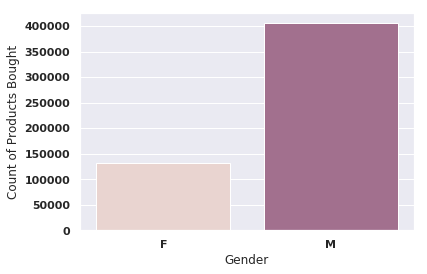

In [173]:
# Visualize demographics - Male/female
ax = sns.countplot(df['Gender'], palette=sns.cubehelix_palette(3))
ax.set_ylabel("Count of Products Bought")
ax.set_xlabel("Gender")

### Normalized Distribution of Products with respect to Gender

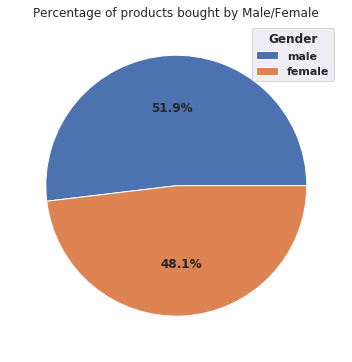

In [187]:
# visualize relative amount spent bought by male and females
m_count = df[df['Gender']=='M'].count()[0]
f_count = df[df['Gender']=='F'].count()[0]


# plot distribution of purchases
m_amount = df[df.Gender == 'M'].Purchase.sum() / m_count
f_amount = df[df.Gender == 'F'].Purchase.sum() / f_count

# Plot graph
plt.figure(figsize=(15,6))
plt.pie([m_amount, f_amount], autopct='%1.1f%%')
plt.title("Percentage of products bought by Male/Female")
plt.legend(["male", "female"], title="Gender", loc='upper right')
plt.show()

# Age

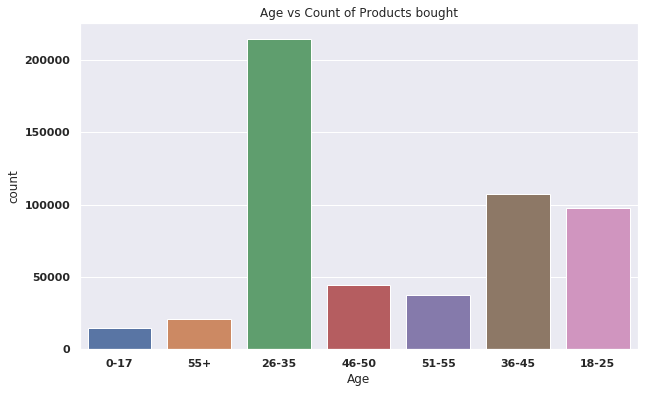

In [188]:
# Visualize Age distributions
plt.figure(figsize=(10,6))
sns.countplot(df['Age'])
plt.title("Age vs Count of Products bought")
plt.show()

# Product

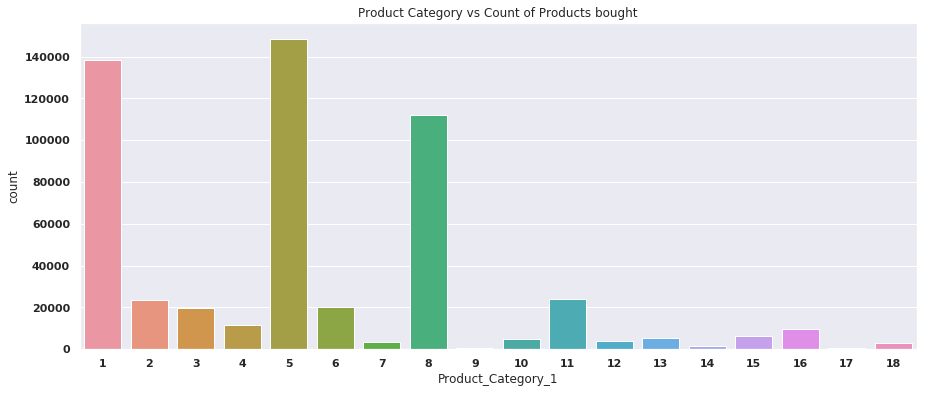

In [189]:
# Visualize product distribution
plt.figure(figsize=(15,6))
sns.countplot(df['Product_Category_1'])
plt.title("Product Category vs Count of Products bought")
plt.show()

## Multiples of product distribution for each Age Group

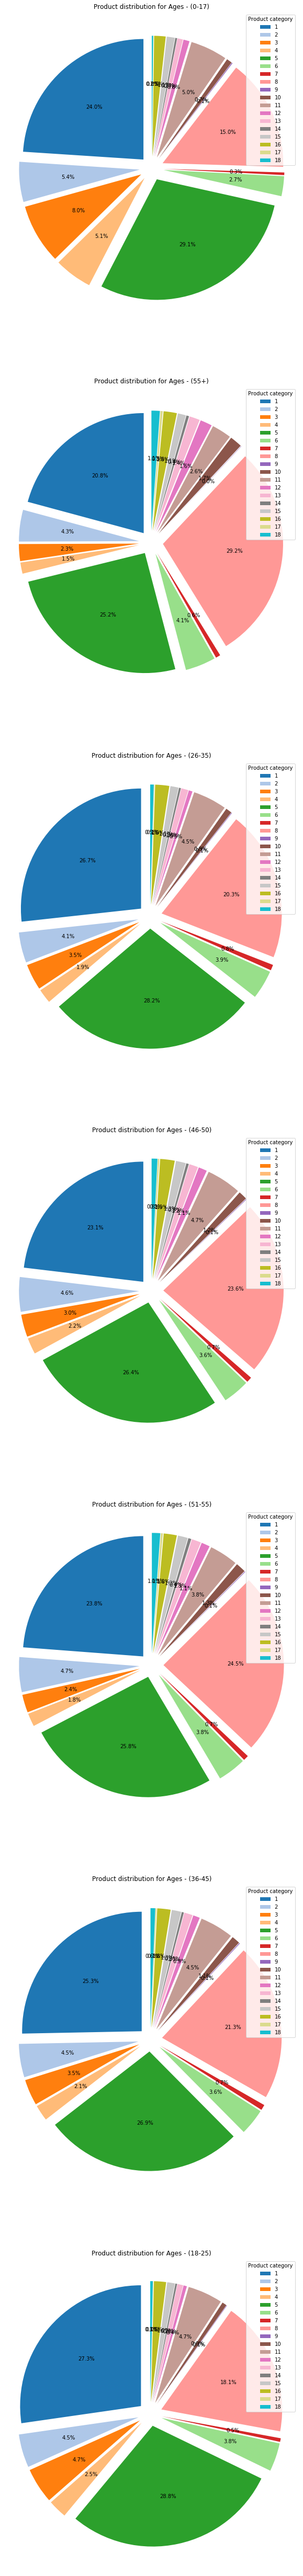

In [114]:
# Get Product labels
labels = np.arange(1, 19)

cs=cm.tab20(np.arange(18)/18)

ages = df['Age'].unique().tolist()
f, ax = plt.subplots(7, figsize=(10,90))
explode = [0.1] * 18 

for i in range(len(ages)):
    df_counts = df[df.Age == ages[i]].Product_Category_1.value_counts()
    df_counts = df_counts.sort_index()
    # Plot
    ax[i].pie(df_counts,colors=cs,startangle=90, explode=explode,
            autopct='%1.1f%%')
    ax[i].legend(labels, title="Product category", loc='upper right')
    ax[i].set_title("Product distribution for Ages - ({})".format(ages[i]))
 
    ax[i].axis('equal')

plt.show()

# Product Distribution based on Gender Percentage

Text(0.5, 0, 'Product Ids')

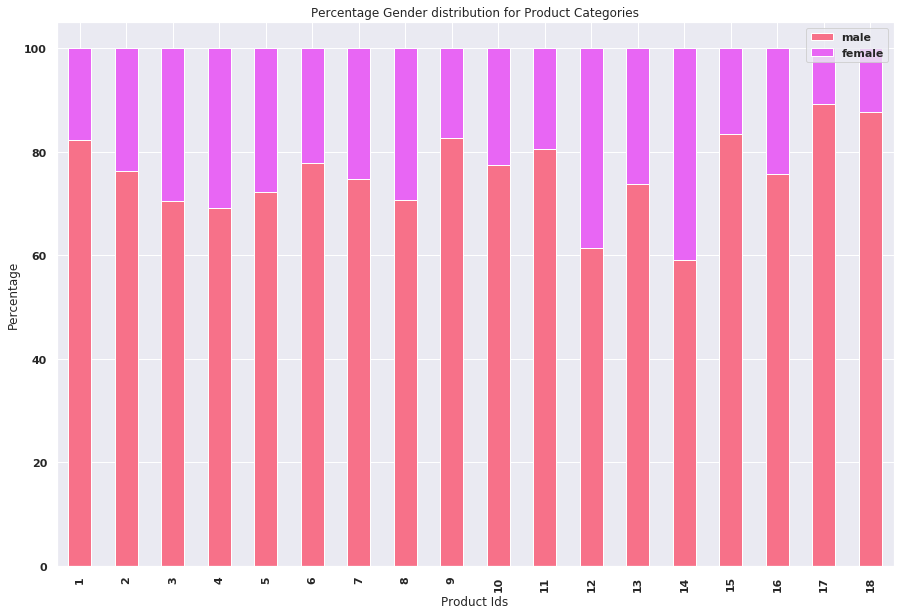

In [191]:

from matplotlib.colors import ListedColormap
products = {
    "male": [],
    "female": []
}

for i in range(1, len(labels)+1):
    # Find number of men in each product category
    male_c = df[(df.Product_Category_1 == i) & (df.Gender == 'M')].count()[0]
    # Find number of women in each product category
    women_c = df[(df.Product_Category_1 == i) & (df.Gender == 'F')].count()[0]
    total = male_c + women_c
    products["male"].append(male_c/total * 100)
    products["female"].append(women_c/total * 100)

df2 = pd.DataFrame(products)

ax = df2.plot.bar(stacked=True, colormap=ListedColormap(sns.color_palette("husl")), figsize=(15,10))
ax.legend(loc='upper right')
ax.set_xticklabels(labels)
ax.set_title("Percentage Gender distribution for Product Categories")
ax.set_ylabel("Percentage")
ax.set_xlabel("Product Ids")